<a href="https://colab.research.google.com/github/Grey-matter2020/Machine-Learning/blob/main/Notebook/Donors_Choose/Logistic_Regression/Donors_Choose_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DonorsChoose

https://www.kaggle.com/competitions/donorschoose-application-screening/data

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p258326`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Educational Support for English Learners at Home</code></li><li><code>Techie Kindergarteners</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need shine guards, athletic socks, Soccer Balls, goalie gloves, and training materials for the upcoming Soccer season.</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `05-12-2016  13:43:57`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `897464ce9ddc600bced1151f324dd63a`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, 4 essays had to be submitted.
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p258326`   
**`description`** | Desciption of the resource. **Example:** `Brewster Wall Pops WPE99065 Peel & Stick Calypso Dry-Erase Dots with Marker, 3-Count`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `16.99`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

In [ ]:
# Connect to the Google Drive to read the iris.csv file
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#List the files in the Data Analyst folder
!ls "/content/gdrive/My Drive/Machine Learning/Logistic Regression"

Donors_Choose_Logistic_Regression.ipynb  resources.csv
glove_vectors				 train_data.csv


In [ ]:
#Changing the directory to Data Analyst folder
%cd "/content/gdrive/My Drive/Machine Learning/Logistic Regression"

/content/gdrive/My Drive/Machine Learning/Logistic Regression


In [ ]:
!pwd

/content/gdrive/My Drive/Machine Learning/Logistic Regression


In [ ]:
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import re
#from nltk.corpus import stopwords
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
import spacy
nlp =spacy.load("en_core_web_sm",disable=['parser', 'ner'])
lemmatizer = spacy.lang.en.English()

## 1.1 Reading Data

In [ ]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :\n", project_data.columns.values)
print('-'*50)
project_data.head(2)

Number of data points in train data (109248, 16)
--------------------------------------------------
The attributes of data :
 ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
--------------------------------------------------


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,25-10-2016 09:22,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

In [ ]:
#To see if any rows have missing values
print(project_data.count())
print("*"*50)
project_data.shape

id                                              109248
teacher_id                                      109248
teacher_prefix                                  109245
school_state                                    109248
project_submitted_datetime                      109248
project_grade_category                          109248
project_subject_categories                      109248
project_subject_subcategories                   109248
project_title                                   109248
project_essay_1                                 109248
project_essay_2                                 109248
project_essay_3                                   3758
project_essay_4                                   3758
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
dtype: int64
**************************************************


(109248, 16)

In [ ]:
#Remove the missing rows for teacher_prefix.Essay_3 and essay_4 is not needed as we will merge all essay columns into one later
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
project_data.dropna(subset=['teacher_prefix'],inplace=True)

In [ ]:
project_data.shape

(109245, 16)

** As we can see that teacher_prefix has 3 values missing and essay_2 and essay_3 has many values missing **

In [ ]:
#To see if any rows have missing values
print(resource_data.count())
print("*"*50)
resource_data.shape

id             1541272
description    1540980
quantity       1541272
price          1541272
dtype: int64
**************************************************


(1541272, 4)

** As we can see that description has some values missing **

In [ ]:
y_value_counts = project_data['project_is_approved'].value_counts()
print(y_value_counts)
type(y_value_counts)

1    92703
0    16542
Name: project_is_approved, dtype: int64


pandas.core.series.Series

In [ ]:
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")


Number of projects thar are approved for funding  92703 , ( 84.85788823287108 %)
Number of projects thar are not approved for funding  16542 , ( 15.14211176712893 %)


**We have imbalanced dataset where 85% belong to one class and 15% belong to another class**

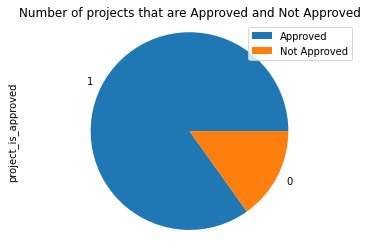

In [ ]:
plt.title("Number of projects that are Approved and Not Approved")
project_data['project_is_approved'].value_counts().plot.pie()
plt.axis('equal')
plt.legend(labels=['Approved','Not Approved'])
plt.show()

## 1.3 preprocessing of `project_subject_categories`

In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)



## 1.4 preprocessing of `project_subject_subcategories`

In [ ]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp=""
    for j in i.split(','):
        j=j.replace("The",'')
        j=j.replace(' ','')
        j=j.replace('&','_')
        j=j.strip()
        temp+=j+" "
    sub_cat_list.append(temp.strip())  

In [ ]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,25-10-2016 09:22,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


## 1.5 Cost per project

In [ ]:
resource_data["Total_Price"]=resource_data["quantity"]*resource_data["price"]

In [ ]:
resource_data[resource_data['id']=='p000001']

,id,description,quantity,price,Total_Price
414179,p000001,"Cap Barbell 300 Pound Olympic Set, Grey",2,261.08,522.16
414180,p000001,Cap Barbell Power Rack Exercise Stand,2,89.00,178.00
414181,p000001,Marcy SB-10510 Flat Bench,1,85.49,85.49
414182,p000001,ProSource Puzzle Exercise Mat High Quality EVA...,2,23.99,47.98


In [ ]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'Total_Price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,Total_Price,quantity
0,p000001,833.63,7
1,p000002,630.28,21


In [ ]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.6 Text preprocessing

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
project_data[project_data['id']=='p253737']

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,Total_Price,quantity,essay
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,596.36,23,My students are English learners that are work...


### 1.6.1 Preprocessing Essay Text

In [ ]:
project_data.head(2)


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,Total_Price,quantity,essay
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,596.36,23,My students are English learners that are work...
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,25-10-2016 09:22,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,299.00,1,Our students arrive to our school eager to lea...


In [ ]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [ ]:
# Expanding some shorter sentences
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# Lemmatization using spacy https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6
# https://stackoverflow.com/questions/56966754/how-can-i-make-spacy-not-produce-the-pron-lemma
def lemmatization(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']):
    doc = nlp(text) 
    text1=" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags])
    return text1

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
print(stops)

{'d', 'not', 'needn', 'more', 'where', 'own', 'hadn', "you'd", 'yourselves', 'all', 'over', 'hers', 'they', "aren't", "haven't", "hasn't", 'ourselves', "wouldn't", 'should', 'he', 'to', 'about', 'themselves', 'him', "should've", 'did', 'most', 'can', 'these', 'for', 'her', 'who', 'your', 's', "couldn't", "hadn't", "she's", 'was', 'doesn', 'which', 'yourself', 'of', "don't", 'but', 'i', 'whom', 'm', 'the', 'no', "you're", 'do', 'be', 'too', 'from', 'those', 'down', 'were', 'what', 'in', 'an', 'as', 'don', 'further', 'such', 'below', 'theirs', 're', 'against', "didn't", 'it', 'while', 'with', 'them', 'haven', 'mightn', 't', 'on', 've', "needn't", 'or', 'wouldn', 'having', "it's", 'both', 'any', "you've", "won't", 'at', 'ma', 'if', 'after', 'there', 'same', 'weren', "weren't", 'been', 'our', 'very', 'hasn', 'am', 'their', 'didn', 'o', "shouldn't", 'myself', 'isn', 'had', 'now', 'won', 'is', 'few', 'just', 'y', 'himself', 'does', 'out', 'off', 'why', 'between', 'will', 'we', 'by', 'yours',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing stop words. I have taken the stopwords from NLTK english package and then removed all the words which will
# not appear given the pre processing steps applied above Like ain't will be modified to ainot
stopwords=['i','me','my','myself','we','our','ours','ourselves','you',"you are","you have","you will","you would",'your','yours','yourself',
 'yourselves','he','him','his','himself','she',"she is",'her','hers','herself','it',"it is",'its','itself','they',
 'them','their','theirs','themselves','what','which','who','whom','this','that',"that will",'these','those','am',
 'is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the',
 'and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through',
 'during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then',
 'once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','only','no','nor','not',
'own','same','so','than','too','very','is','s','t','can','will','just','don',"do not",'should',
 "should have",'now','would','will','am','o','are','have','y']

In [ ]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
#remove special character: https://stackoverflow.com/a/5843547/4084039
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
def data_clean(Text): 
    Text = decontracted(Text)#Expand words
    Text = re.sub("\S*\d\S*", "", Text).strip()#Remove numbers
    Text = re.sub('[^A-Za-z0-9]+', ' ', Text).strip()#Remove special characters
    Text = re.sub(r"\b..\b", ' ', Text).strip()#Remove words less than and equal 3 characters
    Text = re.sub('\\r', ' ' ,Text) # Remove line breaks
    Text = re.sub('\\n', ' ' ,Text)   # remove line breaks
    Text = re.sub('\\"', ' ' ,Text)  # removes ""
    Text = " ".join([word.lower() for word in Text.split() if word.lower() not in stopwords])#Lowercase and remove stop words
    #Text = lemmatization(Text)#Find lemma#This was increasing the data pre processing very heavily so removed for time being
    return Text

In [6]:
# Try out every command for yourself before running the whole code
import re
Text = 'My number is HELLO12345HELLO'
re.sub("\S*\d\S*", "", Text)

'My number is '

In [ ]:
Text = 'I saw a cat and the cat is a agile animal'
re.sub(r"\b..\b", ' ', Text)

' saw  cat and the cat    agile animal'

In [ ]:
Cleaned_data=pd.DataFrame()

In [ ]:
Cleaned_data["Essay_Cleaned"]=project_data["essay"].progress_apply(data_clean)

  0%|          | 0/109245 [00:00<?, ?it/s]

In [ ]:
# after preprocesing
Cleaned_data["Essay_Cleaned"][2000]

'describing students easy task many say inspirational creative hard working unique unique interests learning abilities much common desire learn day despite difficulties encounter nour classroom amazing understand everyone learns pace teacher pride making sure students always engaged motivated inspired create learning nthis project help students choose seating appropriate developmentally many students tire sitting chairs lessons different seats available helps keep engaged learning nflexible seating important classroom many students struggle attention focus engagement currently stability balls seating well regular chairs stools help students trouble balance find difficult sit stability ball long period time excited try stools part engaging classroom community nannan'

In [ ]:
#Before processing
project_data["essay"][2000]

"Describing my students isn't an easy task.  Many would say that they are inspirational, creative, and hard-working.  They are all unique - unique in their interests, their learning, their abilities, and so much more.  What they all have in common is their desire to learn each day, despite difficulties that they encounter.  \\r\\nOur classroom is amazing - because we understand that everyone learns at their own pace.  As the teacher, I pride myself in making sure my students are always engaged, motivated, and inspired to create their own learning! \\r\\nThis project is to help my students choose seating that is more appropriate for them, developmentally.  Many students tire of sitting in chairs during lessons, and having different seats available helps to keep them engaged and learning.\\r\\nFlexible seating is important in our classroom, as many of our students struggle with attention, focus, and engagement.  We currently have stability balls for seating, as well as regular chairs, bu

### 1.6.2 Preprocessing Project Title

In [ ]:
#Before processing
project_data["project_title"][2000]

'Steady Stools for Active Learning'

In [ ]:
Cleaned_data["Project_Title_Cleaned"]=project_data["project_title"].progress_apply(data_clean)

  0%|          | 0/109245 [00:00<?, ?it/s]

In [ ]:
# after preprocesing
Cleaned_data["Project_Title_Cleaned"][2000]

'steady stools active learning'

In [ ]:
Cleaned_data.columns

Index(['Essay_Cleaned', 'Project_Title_Cleaned'], dtype='object')

In [ ]:
project_data.shape


(109245, 19)

In [ ]:
project_data['Essay_Cleaned']=Cleaned_data['Essay_Cleaned']
project_data['Project_Title_Cleaned']=Cleaned_data['Project_Title_Cleaned']

In [ ]:
project_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'Total_Price', 'quantity',
       'essay', 'Essay_Cleaned', 'Project_Title_Cleaned'],
      dtype='object')

In [ ]:
project_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,Total_Price,quantity,essay,Essay_Cleaned,Project_Title_Cleaned
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,...,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,596.36,23,My students are English learners that are work...,students english learners working english seco...,educational support english learners home
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,25-10-2016 09:22,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,...,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,299.00,1,Our students arrive to our school eager to lea...,students arrive school eager learn polite gene...,wanted projector hungry learners
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,31-08-2016 12:03,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,...,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,686.68,22,"\r\n\""True champions aren't always the ones th...",true champions always ones win guts mia hamm q...,soccer equipment awesome middle school students
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,06-10-2016 21:16,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,...,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,431.90,4,I work at a unique school filled with both ESL...,work unique school filled esl english second l...,techie kindergarteners
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,11-07-2016 01:10,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,...,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,143.96,4,Our second grade classroom next year will be m...,second grade classroom next year made around k...,interactive math tools


<h1>2. Logistic Regression</h1>


<h2>2.1 Splitting data into Train and cross validation and test data: Stratified Sampling</h2>

In [ ]:
y = project_data['project_is_approved']
X=project_data.drop(['project_is_approved'], axis=1, inplace=False)
X.head(1)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,Total_Price,quantity,essay,Essay_Cleaned,Project_Title_Cleaned
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,Literacy_Language,ESL Literacy,596.36,23,My students are English learners that are work...,students english learners working english seco...,educational support english learners home


In [ ]:
y.value_counts()

1    92703
0    16542
Name: project_is_approved, dtype: int64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,random_state=41)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train,random_state=41)

In [ ]:
print (type(X_train))
print (type(y_train))
print(X_train.shape)
print(y_train.shape)
print(X_train.columns)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(88488, 20)
(88488,)
Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'Total_Price', 'quantity', 'essay',
       'Essay_Cleaned', 'Project_Title_Cleaned'],
      dtype='object')


In [ ]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(88488, 20) (88488,)
(9832, 20) (9832,)
(10925, 20) (10925,)


In [ ]:
from collections import Counter
print(sorted(Counter(y_train).items()))

[(0, 13399), (1, 75089)]


## 2.2  Preparing data for models

In [ ]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'Total_Price', 'quantity',
       'essay', 'Essay_Cleaned', 'Project_Title_Cleaned'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - Essay : text data
       - project_resource_summary: text data (optional)
       
       - quantity : numerical (optional)
       - teacher_number_of_previously_posted_projects : numerical
       - Total Price : numerical

## 2.3 Vectorizing Categorical data

In [ ]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter_category = Counter()
for word in project_data['clean_categories'].values:
    my_counter_category.update(word.split())

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(my_counter_category.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names_out())

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'])
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'])
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'])
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['Literacy_Language' 'History_Civics' 'Health_Sports' 'Math_Science'
 'SpecialNeeds' 'AppliedLearning' 'Music_Arts' 'Warmth' 'Care_Hunger']
Shape of matrix after one hot encodig  (88488, 9)
Shape of matrix after one hot encodig  (9832, 9)
Shape of matrix after one hot encodig  (10925, 9)


### 2.3.2 Vectorizing Categorical data-Subject SubCategories

In [ ]:
from collections import Counter
my_counter_subcategory = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter_subcategory.update(word.split())

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(my_counter_subcategory.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'])
print(vectorizer.get_feature_names_out())


sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'])
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'])
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'])

print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['ESL' 'Literacy' 'Civics_Government' 'TeamSports' 'Health_Wellness'
 'Mathematics' 'Literature_Writing' 'SpecialNeeds' 'ParentInvolvement'
 'EnvironmentalScience' 'Health_LifeScience' 'AppliedSciences'
 'EarlyDevelopment' 'Music' 'ForeignLanguages' 'Other' 'Economics'
 'FinancialLiteracy' 'Gym_Fitness' 'VisualArts' 'Warmth' 'Care_Hunger'
 'SocialSciences' 'College_CareerPrep' 'CharacterEducation'
 'PerformingArts' 'CommunityService' 'History_Geography'
 'NutritionEducation' 'Extracurricular']
Shape of matrix after one hot encodig  (88488, 30)
Shape of matrix after one hot encodig  (9832, 30)
Shape of matrix after one hot encodig  (10925, 30)


#### 2.3.3 Vectorizing Categorical data-State

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'])
print(vectorizer.get_feature_names_out())


school_state_one_hot_train = vectorizer.transform(X_train['school_state'])
school_state_one_hot_cv = vectorizer.transform(X_cv['school_state'])
school_state_one_hot_test = vectorizer.transform(X_test['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Shape of matrix after one hot encodig  (88488, 51)
Shape of matrix after one hot encodig  (9832, 51)
Shape of matrix after one hot encodig  (10925, 51)


#### 2.3.4 Vectorizing Categorical data-Teacher_prefix 

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'])
print(vectorizer.get_feature_names_out())


teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'])
teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'])
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'])
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

['Dr' 'Mr' 'Mrs' 'Ms' 'Teacher']
Shape of matrix after one hot encodig  (88488, 5)
Shape of matrix after one hot encodig  (9832, 5)
Shape of matrix after one hot encodig  (10925, 5)


#### 2.3.5 Vectorizing Categorical data-project_grade_category 

In [ ]:
#Finding unique grades
list_of_grades=list(set(list(project_data['project_grade_category'])))
list_of_grades

['Grades 6-8', 'Grades 3-5', 'Grades 9-12', 'Grades PreK-2']

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list_of_grades, lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'])
print(vectorizer.get_feature_names_out())


project_grade_categoty_one_hot_train = vectorizer.transform(X_train['project_grade_category'])
project_grade_categoty_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'])
project_grade_categoty_one_hot_test = vectorizer.transform(X_test['project_grade_category'])

print("Shape of matrix after one hot encodig ",project_grade_categoty_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",project_grade_categoty_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",project_grade_categoty_one_hot_test.shape)

['Grades 6-8' 'Grades 3-5' 'Grades 9-12' 'Grades PreK-2']
Shape of matrix after one hot encodig  (88488, 4)
Shape of matrix after one hot encodig  (9832, 4)
Shape of matrix after one hot encodig  (10925, 4)


## 2.4 Vectorizing Text data





#### 2.4.1 Bag of words on Essays

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
fitted_text_bow=vectorizer.fit(X_train["Essay_Cleaned"])


transformed_text_bow_train = fitted_text_bow.transform(X_train["Essay_Cleaned"])
transformed_text_bow_cv = fitted_text_bow.transform(X_cv["Essay_Cleaned"])
transformed_text_bow_test = fitted_text_bow.transform(X_test["Essay_Cleaned"])

print("Shape of matrix after one hot encodig ",transformed_text_bow_train.shape)
print("Shape of matrix after one hot encodig ",transformed_text_bow_cv.shape)
print("Shape of matrix after one hot encodig ",transformed_text_bow_test.shape)

Shape of matrix after one hot encodig  (88488, 5000)
Shape of matrix after one hot encodig  (9832, 5000)
Shape of matrix after one hot encodig  (10925, 5000)


### 2.4.2 Bag of Words on `project_title`

In [ ]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10)
fitted_project_title_bow=vectorizer.fit(X_train["Project_Title_Cleaned"])

transformed_project_title_bow_train = fitted_project_title_bow.transform(X_train["Project_Title_Cleaned"])
transformed_project_title_bow_cv = fitted_project_title_bow.transform(X_cv["Project_Title_Cleaned"])
transformed_project_title_bow_test = fitted_project_title_bow.transform(X_test["Project_Title_Cleaned"])

print("Shape of matrix after one hot encodig ",transformed_project_title_bow_train.shape)
print("Shape of matrix after one hot encodig ",transformed_project_title_bow_cv.shape)
print("Shape of matrix after one hot encodig ",transformed_project_title_bow_test.shape)

Shape of matrix after one hot encodig  (88488, 2803)
Shape of matrix after one hot encodig  (9832, 2803)
Shape of matrix after one hot encodig  (10925, 2803)


#### 2.4.3 TFIDF vectorizer on Essays

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfTransformer(norm=None)
fitted_text_tfidf = vectorizer.fit(transformed_text_bow_train)


transformed_text_tfidf_train=fitted_text_tfidf.transform(transformed_text_bow_train)
transformed_text_tfidf_cv=fitted_text_tfidf.transform(transformed_text_bow_cv)
transformed_text_tfidf_test=fitted_text_tfidf.transform(transformed_text_bow_test)

print("Shape of matrix after one hot encodig ",transformed_text_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",transformed_text_tfidf_cv.shape)
print("Shape of matrix after one hot encodig ",transformed_text_tfidf_test.shape)

Shape of matrix after one hot encodig  (88488, 5000)
Shape of matrix after one hot encodig  (9832, 5000)
Shape of matrix after one hot encodig  (10925, 5000)


### 2.4.4 TFIDF Vectorizer on `project_title`

In [ ]:
# Similarly you can vectorize for title also
vectorizer = TfidfTransformer(norm=None)
fitted_project_title_tfidf = vectorizer.fit(transformed_project_title_bow_train)


transformed_project_title_tfidf_train=fitted_project_title_tfidf.transform(transformed_project_title_bow_train)
transformed_project_title_tfidf_cv=fitted_project_title_tfidf.transform(transformed_project_title_bow_cv)
transformed_project_title_tfidf_test=fitted_project_title_tfidf.transform(transformed_project_title_bow_test)


print("Shape of matrix after one hot encodig ",transformed_project_title_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",transformed_project_title_tfidf_cv.shape)
print("Shape of matrix after one hot encodig ",transformed_project_title_tfidf_test.shape)

Shape of matrix after one hot encodig  (88488, 2803)
Shape of matrix after one hot encodig  (9832, 2803)
Shape of matrix after one hot encodig  (10925, 2803)


#### 2.4.5 Using Pretrained Models: Avg W2V on Essay





In [ ]:
'''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r',encoding="utf8")
    model = {}
    for line in tqdm_notebook(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    f.close()
    return model
model = loadGloveModel('glove.42B.300d.txt')'''

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

In [ ]:
'''#Understanding above code
#Counting all the words in our essay and project title corpus
words = []
words.extend(fitted_text_bow.get_feature_names())
print(len(words))
words.extend(fitted_project_title_bow.get_feature_names())
print("Total words in our corpus",len(words))
print('*'*50)
inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")
print('*'*50)
words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))'''

In [ ]:
'''# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors1', 'wb') as f:
    pickle.dump(words_courpus, f)'''

In [ ]:
import pickle

In [ ]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file

with open('glove_vectors', 'rb') as f:
    glove_model = pickle.load(f)
    glove_words =  set(glove_model.keys())

### 2.4.6 Using Pretrained Models: AVG W2V on `Essay`

In [ ]:
# average Word2Vec
# compute average word2vec for each essay.

essay_Avg_W2V_train = []
for each_essay in tqdm_notebook(X_train['Essay_Cleaned']):
    each_essay_vec =np.zeros(300)
    cnt_words=0
    for word in each_essay.split():
        if word in glove_words:
            word_vec = glove_model[word]
            each_essay_vec += word_vec
            cnt_words += 1
    if cnt_words !=0:
            each_essay_vec /= cnt_words
    essay_Avg_W2V_train.append(each_essay_vec)  
print(len(essay_Avg_W2V_train))
print(len(essay_Avg_W2V_train[0]))

  0%|          | 0/88488 [00:00<?, ?it/s]

88488
300


In [ ]:
# average Word2Vec
# compute average word2vec for each essay.

essay_Avg_W2V_cv = []
for each_essay in tqdm_notebook(X_cv['Essay_Cleaned']):
    each_essay_vec =np.zeros(300)
    cnt_words=0
    for word in each_essay.split():
        if word in glove_words:
            word_vec = glove_model[word]
            each_essay_vec += word_vec
            cnt_words += 1
    if cnt_words !=0:
            each_essay_vec /= cnt_words
    essay_Avg_W2V_cv.append(each_essay_vec)  
print(len(essay_Avg_W2V_cv))
print(len(essay_Avg_W2V_cv[0]))

  0%|          | 0/9832 [00:00<?, ?it/s]

9832
300


In [ ]:
# average Word2Vec
# compute average word2vec for each essay.

essay_Avg_W2V_test = []
for each_essay in tqdm_notebook(X_test['Essay_Cleaned']):
    each_essay_vec =np.zeros(300)
    cnt_words=0
    for word in each_essay.split():
        if word in glove_words:
            word_vec = glove_model[word]
            each_essay_vec += word_vec
            cnt_words += 1
    if cnt_words !=0:
            each_essay_vec /= cnt_words
    essay_Avg_W2V_test.append(each_essay_vec)  
print(len(essay_Avg_W2V_test))
print(len(essay_Avg_W2V_test[0]))

  0%|          | 0/10925 [00:00<?, ?it/s]

10925
300


### 2.4.7 Using Pretrained Models: AVG W2V on `project_title`

In [ ]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.

project_title_Avg_W2V_train = []
for each_project_title in tqdm_notebook(X_train['Project_Title_Cleaned']):
    each_project_title_vec =np.zeros(300)
    cnt_words=0
    for word in each_project_title.split():
        if word in glove_words:
            word_vec = glove_model[word]
            each_project_title_vec += word_vec
            cnt_words += 1
    if cnt_words !=0:
            each_project_title_vec /= cnt_words
    project_title_Avg_W2V_train.append(each_project_title_vec)  
print(len(project_title_Avg_W2V_train))
print(len(project_title_Avg_W2V_train[0]))

  0%|          | 0/88488 [00:00<?, ?it/s]

88488
300


In [ ]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.

project_title_Avg_W2V_cv = []
for each_project_title in tqdm_notebook(X_cv['Project_Title_Cleaned']):
    each_project_title_vec =np.zeros(300)
    cnt_words=0
    for word in each_project_title.split():
        if word in glove_words:
            word_vec = glove_model[word]
            each_project_title_vec += word_vec
            cnt_words += 1
    if cnt_words !=0:
            each_project_title_vec /= cnt_words
    project_title_Avg_W2V_cv.append(each_project_title_vec)  
print(len(project_title_Avg_W2V_cv))
print(len(project_title_Avg_W2V_cv[0]))

  0%|          | 0/9832 [00:00<?, ?it/s]

9832
300


In [ ]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.

project_title_Avg_W2V_test = []
for each_project_title in tqdm_notebook(X_test['Project_Title_Cleaned']):
    each_project_title_vec =np.zeros(300)
    cnt_words=0
    for word in each_project_title.split():
        if word in glove_words:
            word_vec = glove_model[word]
            each_project_title_vec += word_vec
            cnt_words += 1
    if cnt_words !=0:
            each_project_title_vec /= cnt_words
    project_title_Avg_W2V_test.append(each_project_title_vec)  
print(len(project_title_Avg_W2V_test))
print(len(project_title_Avg_W2V_test[0]))

  0%|          | 0/10925 [00:00<?, ?it/s]

10925
300


### 2.4.8 Using Pretrained Models: TFIDF weighted W2V on Essay

In [ ]:
essay_idf=dict(zip(fitted_text_bow.get_feature_names_out(),list(fitted_text_tfidf.idf_)))

In [ ]:
# tfidf weighted Word2Vec
# compute tfidf weighted word2vec for each essay.

list_of_features = fitted_text_bow.get_feature_names_out()
essay_tfidf_weighted_train = []
for each_essay in tqdm_notebook(X_train['Essay_Cleaned']):
    each_essay_vec =np.zeros(300)
    tfidf_sum=0
    for word in each_essay.split():
        if word in glove_words and word in list_of_features:
            word_vec = glove_model[word]
            tf_idf=(each_essay.count(word)/len(each_essay))*essay_idf[word]
            each_essay_vec += word_vec*tf_idf
            tfidf_sum += tf_idf
    if tfidf_sum !=0:
            each_essay_vec /= tfidf_sum
    essay_tfidf_weighted_train.append(each_essay_vec)  
  
print (len(essay_tfidf_weighted_train))
print (len(essay_tfidf_weighted_train[0]))

  0%|          | 0/88488 [00:00<?, ?it/s]

88488
300


In [ ]:
# tfidf weighted Word2Vec
# compute tfidf weighted word2vec for each essay.

list_of_features = fitted_text_bow.get_feature_names_out()
essay_tfidf_weighted_cv = []
for each_essay in tqdm_notebook(X_cv['Essay_Cleaned']):
    each_essay_vec =np.zeros(300)
    tfidf_sum=0
    for word in each_essay.split():
        if word in glove_words and word in list_of_features:
            word_vec = glove_model[word]
            tf_idf=(each_essay.count(word)/len(each_essay))*essay_idf[word]
            each_essay_vec += word_vec*tf_idf
            tfidf_sum += tf_idf
    if tfidf_sum !=0:
            each_essay_vec /= tfidf_sum
    essay_tfidf_weighted_cv.append(each_essay_vec)  
  
print (len(essay_tfidf_weighted_cv))
print (len(essay_tfidf_weighted_cv[0]))

  0%|          | 0/9832 [00:00<?, ?it/s]

9832
300


In [ ]:
# tfidf weighted Word2Vec
# compute tfidf weighted word2vec for each essay.

list_of_features = fitted_text_bow.get_feature_names_out()
essay_tfidf_weighted_test = []
for each_essay in tqdm_notebook(X_test['Essay_Cleaned']):
    each_essay_vec =np.zeros(300)
    tfidf_sum=0
    for word in each_essay.split():
        if word in glove_words and word in list_of_features:
            word_vec = glove_model[word]
            tf_idf=(each_essay.count(word)/len(each_essay))*essay_idf[word]
            each_essay_vec += word_vec*tf_idf
            tfidf_sum += tfidf_sum
    if tfidf_sum !=0:
            each_essay_vec /= tfidf_sum
    essay_tfidf_weighted_test.append(each_essay_vec)  
  
print (len(essay_tfidf_weighted_test))
print (len(essay_tfidf_weighted_test[0]))

  0%|          | 0/10925 [00:00<?, ?it/s]

10925
300


### 2.4.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`

In [ ]:
project_title_idf=dict(zip(fitted_project_title_bow.get_feature_names_out(),list(fitted_project_title_tfidf.idf_)))

In [ ]:
# Similarly you can vectorize for title also

list_of_features = fitted_project_title_bow.get_feature_names_out()
project_title_tfidf_weighted_train = []
for each_project_title in tqdm_notebook(X_train['Project_Title_Cleaned']):
    each_project_title_vec =np.zeros(300)
    tfidf_sum=0
    for word in each_project_title.split():
        if word in glove_words and word in list_of_features:
            word_vec = glove_model[word]
            tf_idf=(each_project_title.count(word)/len(each_project_title))*project_title_idf[word]
            each_project_title_vec += word_vec*tf_idf
            tfidf_sum += tfidf_sum
    if tfidf_sum !=0:
            each_project_title_vec /= tfidf_sum
    project_title_tfidf_weighted_train.append(each_project_title_vec)  
  
print (len(project_title_tfidf_weighted_train))
print (len(project_title_tfidf_weighted_train[0]))

  0%|          | 0/88488 [00:00<?, ?it/s]

88488
300


In [ ]:
# Similarly you can vectorize for title also

list_of_features = fitted_project_title_bow.get_feature_names_out()
project_title_tfidf_weighted_cv = []
for each_project_title in tqdm_notebook(X_cv['Project_Title_Cleaned']):
    each_project_title_vec =np.zeros(300)
    tfidf_sum=0
    for word in each_project_title.split():
        if word in glove_words and word in list_of_features:
            word_vec = glove_model[word]
            tf_idf=(each_project_title.count(word)/len(each_project_title))*project_title_idf[word]
            each_project_title_vec += word_vec*tf_idf
            tfidf_sum += tfidf_sum
    if tfidf_sum !=0:
            each_project_title_vec /= tfidf_sum
    project_title_tfidf_weighted_cv.append(each_project_title_vec)  
  
print (len(project_title_tfidf_weighted_cv))
print (len(project_title_tfidf_weighted_cv[0]))

  0%|          | 0/9832 [00:00<?, ?it/s]

9832
300


In [ ]:
# Similarly you can vectorize for title also

list_of_features = fitted_project_title_bow.get_feature_names_out()
project_title_tfidf_weighted_test = []
for each_project_title in tqdm_notebook(X_test['Project_Title_Cleaned']):
    each_project_title_vec =np.zeros(300)
    tfidf_sum=0
    for word in each_project_title.split():
        if word in glove_words and word in list_of_features:
            word_vec = glove_model[word]
            tf_idf=(each_project_title.count(word)/len(each_project_title))*project_title_idf[word]
            each_project_title_vec += word_vec*tf_idf
            tfidf_sum += tfidf_sum
    if tfidf_sum !=0:
            each_project_title_vec /= tfidf_sum
    project_title_tfidf_weighted_test.append(each_project_title_vec)  
  
print (len(project_title_tfidf_weighted_test))
print (len(project_title_tfidf_weighted_test[0]))

  0%|          | 0/10925 [00:00<?, ?it/s]

10925
300




### 2.5.1 Vectorizing Numerical features - Total_Price

In [ ]:
project_data['Total_Price'].shape

(109245,)

In [ ]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['Total_Price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['Total_Price'].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['Total_Price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['Total_Price'].values.reshape(-1, 1))

print("Shape of matrix after standardization ",price_standardized_train.shape)
print("Shape of matrix after standardization ",price_standardized_cv.shape)
print("Shape of matrix after standardization ",price_standardized_test.shape)

Mean : 544.2142428351866, Standard deviation : 545.5975097627115
Shape of matrix after standardization  (88488, 1)
Shape of matrix after standardization  (9832, 1)
Shape of matrix after standardization  (10925, 1)


### 2.5.2 Vectorizing Numerical features - teacher_number_of_previously_posted_projects 

In [ ]:
project_data['teacher_number_of_previously_posted_projects'].shape

(109245,)

In [ ]:
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = teacher_number_of_previously_posted_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized_cv = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized_test = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


print("Shape of matrix after one hot encodig ",teacher_number_of_previously_posted_projects_standardized_train.shape)
print("Shape of matrix after one hot encodig ",teacher_number_of_previously_posted_projects_standardized_cv.shape)
print("Shape of matrix after one hot encodig ",teacher_number_of_previously_posted_projects_standardized_test.shape)

Mean : 11.179052526896303, Standard deviation : 27.733239898848606
Shape of matrix after one hot encodig  (88488, 1)
Shape of matrix after one hot encodig  (9832, 1)
Shape of matrix after one hot encodig  (10925, 1)


## 6 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

<ul><h3>Build the data matrix using these features</h3>
        <li>school_state                     : categorical data (one hot encoding)</li>
        <li>clean_categories                 : categorical data (one hot encoding)</li>
        <li>clean_subcategories              : categorical data (one hot encoding)</li>
        <li>teacher_prefix                   : categorical data (one hot encoding)</li>
        <li>project_grade_category           : categorical data (one hot encoding)</li>
        <li>essay                    : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
        <li>price                            : numerical</li>
        <li>teacher_number_of_previously_posted_projects : numerical</li>
 

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='black'>Set 1</font>: categorical, numerical features  + preprocessed_eassay (`BOW with bi-grams`) 

       
</ol>

## Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)

In [ ]:
#Before we merge lets look at the size of all the data to make sure 

#Before we merge lets look at the size of all the data to make sure 
print ("Shape of Train data")
print(school_state_one_hot_train.shape)
print(categories_one_hot_train.shape)
print(sub_categories_one_hot_train.shape)
print(teacher_prefix_one_hot_train.shape)
print(project_grade_categoty_one_hot_train.shape)
print(price_standardized_train.shape)
print(teacher_number_of_previously_posted_projects_standardized_train.shape)
print(transformed_text_bow_train.shape)
print(transformed_project_title_bow_train.shape)
print(transformed_project_title_tfidf_train.shape)
print(len(essay_Avg_W2V_train),len(essay_Avg_W2V_train[0]))
print(len(essay_tfidf_weighted_train),len(essay_tfidf_weighted_train[0]))
print(len(project_title_Avg_W2V_train),len(project_title_Avg_W2V_train[0]))
print(len(project_title_tfidf_weighted_train),len(project_title_tfidf_weighted_train[0]))

print ('*'*50)


print ("Shape of CV data")
print(school_state_one_hot_cv.shape)
print(categories_one_hot_cv.shape)
print(sub_categories_one_hot_cv.shape)
print(teacher_prefix_one_hot_cv.shape)
print(project_grade_categoty_one_hot_cv.shape)
print(price_standardized_cv.shape)
print(teacher_number_of_previously_posted_projects_standardized_cv.shape)
print(transformed_text_bow_cv.shape)
print(transformed_project_title_bow_cv.shape)
print(transformed_project_title_tfidf_cv.shape)
print(len(essay_Avg_W2V_cv),len(essay_Avg_W2V_cv[0]))
print(len(essay_tfidf_weighted_cv),len(essay_tfidf_weighted_cv[0]))
print(len(project_title_Avg_W2V_cv),len(project_title_Avg_W2V_cv[0]))
print(len(project_title_tfidf_weighted_cv),len(project_title_tfidf_weighted_cv[0]))


print ('*'*50)
print ("Shape of Test data")
print(school_state_one_hot_test.shape)
print(categories_one_hot_test.shape)
print(sub_categories_one_hot_test.shape)
print(teacher_prefix_one_hot_test.shape)
print(project_grade_categoty_one_hot_test.shape)
print(price_standardized_test.shape)
print(teacher_number_of_previously_posted_projects_standardized_test.shape)
print(transformed_text_bow_test.shape)
print(transformed_project_title_bow_test.shape)
print(transformed_project_title_tfidf_test.shape)
print(len(essay_Avg_W2V_test),len(essay_Avg_W2V_test[0]))
print(len(essay_tfidf_weighted_test),len(essay_tfidf_weighted_test[0]))
print(len(project_title_Avg_W2V_test),len(project_title_Avg_W2V_test[0]))
print(len(project_title_tfidf_weighted_test),len(project_title_tfidf_weighted_test[0]))


print ('*'*50)



Shape of Train data
(88488, 51)
(88488, 9)
(88488, 30)
(88488, 5)
(88488, 4)
(88488, 1)
(88488, 1)
(88488, 5000)
(88488, 2803)
(88488, 2803)
88488 300
88488 300
88488 300
88488 300
**************************************************
Shape of CV data
(9832, 51)
(9832, 9)
(9832, 30)
(9832, 5)
(9832, 4)
(9832, 1)
(9832, 1)
(9832, 5000)
(9832, 2803)
(9832, 2803)
9832 300
9832 300
9832 300
9832 300
**************************************************
Shape of Test data
(10925, 51)
(10925, 9)
(10925, 30)
(10925, 5)
(10925, 4)
(10925, 1)
(10925, 1)
(10925, 5000)
(10925, 2803)
(10925, 2803)
10925 300
10925 300
10925 300
10925 300
**************************************************


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((school_state_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,teacher_number_of_previously_posted_projects_standardized_train,project_grade_categoty_one_hot_train,price_standardized_train,teacher_prefix_one_hot_train,transformed_text_bow_train,transformed_project_title_bow_train)).tocsr()
X_cr_bow = hstack((school_state_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,teacher_number_of_previously_posted_projects_standardized_cv,project_grade_categoty_one_hot_cv,price_standardized_cv,teacher_prefix_one_hot_cv,transformed_text_bow_cv,transformed_project_title_bow_cv)).tocsr()
X_te_bow = hstack((school_state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,teacher_number_of_previously_posted_projects_standardized_test,project_grade_categoty_one_hot_test,price_standardized_test,teacher_prefix_one_hot_test,transformed_text_bow_test,transformed_project_title_bow_test)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(88488, 7904) (88488,)
(9832, 7904) (9832,)
(10925, 7904) (10925,)


In [ ]:
import pickle
with open('X_tr_pickle_bow', 'wb') as X_tr_write_file:
    pickle.dump(X_tr_bow, X_tr_write_file)
with open('X_cr_pickle_bow', 'wb') as X_cr_write_file:
    pickle.dump(X_cr_bow, X_cr_write_file)
with open('X_te_pickle_bow', 'wb') as X_te_write_file:
    pickle.dump(X_te_bow, X_te_write_file)
with open('y_train', 'wb') as y_train_write_file:
    pickle.dump(y_train, y_train_write_file)
with open('y_cv', 'wb') as y_cv_write_file:
    pickle.dump(y_cv, y_cv_write_file)
with open('y_test', 'wb') as y_test_write_file:
    pickle.dump(y_test, y_test_write_file)       

In [ ]:
import pickle

In [ ]:
with open(r'C:\Users\kasturi.karuna\AppliedAI course\Assignment 5\X_tr_pickle_bow', 'rb') as  X_tr_read_file:
    X_tr_bow = pickle.load(X_tr_read_file)
with open(r'C:\Users\kasturi.karuna\AppliedAI course\Assignment 5\X_cr_pickle_bow', 'rb') as  X_cr_read_file:
    X_cr_bow = pickle.load(X_cr_read_file)
with open(r'C:\Users\kasturi.karuna\AppliedAI course\Assignment 5\X_te_pickle_bow', 'rb') as  X_te_read_file:
    X_te_bow = pickle.load(X_te_read_file)
    
with open(r'C:\Users\kasturi.karuna\AppliedAI course\Assignment 5\y_train', 'rb') as  y_train_read_file:
    y_train = pickle.load(y_train_read_file)
with open(r'C:\Users\kasturi.karuna\AppliedAI course\Assignment 5\y_cv', 'rb') as  y_cv_read_file:
    y_cv = pickle.load(y_cv_read_file)
with open(r'C:\Users\kasturi.karuna\AppliedAI course\Assignment 5\y_test', 'rb') as  y_test_read_file:
    y_test = pickle.load(y_test_read_file)    

In [ ]:
print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(88488, 7904) (88488,)
(9832, 7904) (9832,)
(10925, 7904) (10925,)


### Hyper paramter tuning to find best lambda
<ol> Find the best hyper parameter which results in the maximum AUC value</ol>
    <ol> Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</ol>
        <ol> Use gridsearch-cv or randomsearch-cv or write your own for loops to do this task</ol>

#### 3.1 Method 1: Simple Cross Validation and AUC score

In [ ]:
#Importing some useful libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [ ]:

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc_bow = []
cv_auc_bow = []
lambda_hyperparameter = [0.001,0.01,0.1,1,10,50,100,200,500,1000,2000]
C_hyperparameter=[1000,100,10,1,0.1,0.02,0.01,0.005,0.002,0.0001,0.00005]

for i in C_hyperparameter:
    classifier_LR =LogisticRegression(penalty="l2",C=i,class_weight="balanced")
    classifier_LR.fit(X_tr_bow, y_train)

    y_train_pred_bow = classifier_LR.predict_proba(X_tr_bow)[:,1]   
    y_cv_pred_bow = classifier_LR.predict_proba(X_cr_bow)[:,1]
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_bow.append(roc_auc_score(y_train,y_train_pred_bow))
    cv_auc_bow.append(roc_auc_score(y_cv, y_cv_pred_bow))

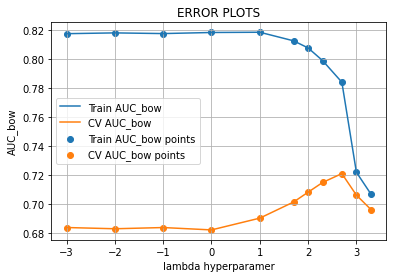

In [ ]:
plt.plot(np.log10(lambda_hyperparameter), train_auc_bow, label='Train AUC_bow')
plt.plot(np.log10(lambda_hyperparameter), cv_auc_bow, label='CV AUC_bow')

plt.scatter(np.log10(lambda_hyperparameter), train_auc_bow, label='Train AUC_bow points')
plt.scatter(np.log10(lambda_hyperparameter), cv_auc_bow, label='CV AUC_bow points')

plt.legend()
plt.xlabel("lambda hyperparamer")
plt.ylabel("AUC_bow")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
from prettytable import PrettyTable
    
x_bow = PrettyTable()
x_bow.field_names = ["Lambda", "TRAIN_AUC_bow","CV_AUC_bow"]
for i in range(len(lambda_hyperparameter)):
    x_bow.add_row([lambda_hyperparameter[i],round(train_auc_bow[i],2),round(cv_auc_bow[i],2)])
    
print(x_bow)

+--------+---------------+------------+
| Lambda | TRAIN_AUC_bow | CV_AUC_bow |
+--------+---------------+------------+
| 0.001  |      0.82     |    0.68    |
|  0.01  |      0.82     |    0.68    |
|  0.1   |      0.82     |    0.68    |
|   1    |      0.82     |    0.68    |
|   10   |      0.82     |    0.69    |
|   50   |      0.81     |    0.7     |
|  100   |      0.81     |    0.71    |
|  200   |      0.8      |    0.72    |
|  500   |      0.78     |    0.72    |
|  1000  |      0.72     |    0.71    |
|  2000  |      0.71     |    0.7     |
+--------+---------------+------------+


#### By using Cross validation method we get highest AUC at lambda=200 with AUC value approximately around 73%

#### 3.2  Method 2: K fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_bow=[]
for i in C_hyperparameter:
    classifier_LR =LogisticRegression(penalty="l2",C=i,class_weight="balanced")
    scores=cross_val_score(classifier_LR,X_tr_bow,y_train,cv=5,scoring='roc_auc')
    cv_scores_bow.append(scores.mean())
    

In [ ]:
y_bow = PrettyTable()
y_bow.field_names = ["lambda", "CV_AUC"]
for i in range(len(lambda_hyperparameter)):
    y_bow.add_row([lambda_hyperparameter[i],round(cv_scores_bow[i],2)])
    
print(y_bow)

+--------+--------+
| lambda | CV_AUC |
+--------+--------+
| 0.001  |  0.69  |
|  0.01  |  0.69  |
|  0.1   |  0.69  |
|   1    |  0.69  |
|   10   |  0.7   |
|   50   |  0.71  |
|  100   |  0.72  |
|  200   |  0.73  |
|  500   |  0.73  |
|  1000  |  0.7   |
|  2000  |  0.69  |
+--------+--------+


#### By using k fold Cross validation method we get highest AUC at lambda=200 with AUC value approximately around 72%

#### 3.2  Method 3: GridSearch or randomsearch

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

classifier_LR =LogisticRegression(penalty="l2",class_weight="balanced")
parameters = {'C':[1000,100,10,1,0.1,0.02,0.01,0.005,0.002,0.0001,0.00005]}
GridSV_model=GridSearchCV(classifier_LR, param_grid=parameters, scoring='roc_auc',cv=5,return_train_score=True)
GridSV_model.fit(X_tr_bow,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.02, 0.01, 0.005, 0.002,
                               0.0001, 5e-05]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
train_auc_GS_bow= GridSV_model.cv_results_['mean_train_score']
train_auc_std_GS_bow= GridSV_model.cv_results_['std_train_score']
cv_auc_GS_bow = GridSV_model.cv_results_['mean_test_score'] 
cv_auc_std_GS_bow= GridSV_model.cv_results_['std_test_score']

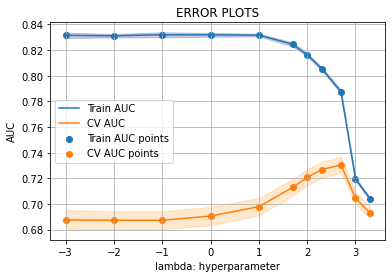

In [ ]:
plt.plot(np.log10(lambda_hyperparameter), train_auc_GS_bow, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(lambda_hyperparameter),train_auc_GS_bow - train_auc_std_GS_bow,train_auc_GS_bow + train_auc_std_GS_bow,alpha=0.2,color='darkblue')

plt.plot(np.log10(lambda_hyperparameter), cv_auc_GS_bow, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(lambda_hyperparameter),cv_auc_GS_bow - cv_auc_std_GS_bow,cv_auc_GS_bow + cv_auc_std_GS_bow,alpha=0.2,color='darkorange')

plt.scatter(np.log10(lambda_hyperparameter), train_auc_GS_bow, label='Train AUC points')
plt.scatter(np.log10(lambda_hyperparameter), cv_auc_GS_bow, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
z_bow = PrettyTable()
z_bow.field_names = ["Lambda","Train_AUC" ,"CV_AUC"]
for i in range(len(lambda_hyperparameter)):
    z_bow.add_row([lambda_hyperparameter[i],round(train_auc_GS_bow[i],2),round(cv_auc_GS_bow[i],2)])
    
print(z_bow)

+--------+-----------+--------+
| Lambda | Train_AUC | CV_AUC |
+--------+-----------+--------+
| 0.001  |    0.83   |  0.69  |
|  0.01  |    0.83   |  0.69  |
|  0.1   |    0.83   |  0.69  |
|   1    |    0.83   |  0.69  |
|   10   |    0.83   |  0.7   |
|   50   |    0.82   |  0.71  |
|  100   |    0.82   |  0.72  |
|  200   |    0.81   |  0.73  |
|  500   |    0.79   |  0.73  |
|  1000  |    0.72   |  0.7   |
|  2000  |    0.7    |  0.69  |
+--------+-----------+--------+


#### By using Grid Search validation method we get highest AUC at lambda=200 with AUC value approximately around 72%

#### The Best lambda=200
#### We will now train our final model using lambda=200
#### Predicting AUC on Test Data

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

classifier_LR_bestlambda=LogisticRegression(penalty="l2",class_weight="balanced",C=0.005)
classifier_LR_bestlambda.fit(X_tr_bow, y_train)


y_train_pred_bestlambda_bow = classifier_LR_bestlambda.predict_proba(X_tr_bow)[:,1]
y_cv_pred_bestlambda_bow = classifier_LR_bestlambda.predict_proba(X_cr_bow)[:,1]
y_test_pred_bestlambda_bow=classifier_LR_bestlambda.predict_proba(X_te_bow)[:,1]

             
train_auc_bestlambda_bow = roc_auc_score(y_train,y_train_pred_bestlambda_bow)
cv_auc_bestlambda_bow = roc_auc_score(y_cv, y_cv_pred_bestlambda_bow)
test_auc_bestlambda_bow = roc_auc_score(y_test, y_test_pred_bestlambda_bow)

In [ ]:
print(train_auc_bestlambda_bow)
print(cv_auc_bestlambda_bow)
print(test_auc_bestlambda_bow)

0.7991706169598711
0.7150432429208176
0.7054386935793467


In [ ]:
train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred_bestlambda_bow)
cv_fpr_bow, cv_tpr_bow, cv_thresholds_bow = roc_curve(y_cv, y_cv_pred_bestlambda_bow)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred_bestlambda_bow)


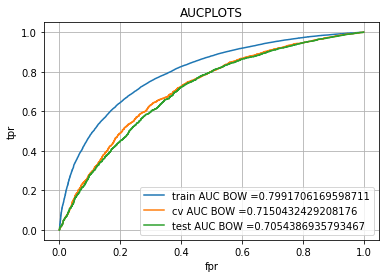

In [ ]:
plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC BOW ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(cv_fpr_bow, cv_tpr_bow, label="cv AUC BOW ="+str(auc(cv_fpr_bow, cv_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="test AUC BOW ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUCPLOTS")
plt.grid()
plt.show()

#### The Test AUC=73% which is very close to CV AUC score and hence the model seems to be performing at the same accuracy as for the CV data

#### 3.4  Confusion Matrix and Accuracy and Recall metrics

In [ ]:
#We will try to find a threshold score for determing the class for which TPR is high and FPR is low
#This can be achieved via 2 ways...either we find maximum of tpr*(1-fpr) or max of trp/fpr. Both this will try to maximize 
#tpd and minimize fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print ('*'*50)
print('For train Data')
print('Confusion Matrix')
CM_train=confusion_matrix(y_train,predict(y_train_pred_bestlambda_bow, tr_thresholds_bow,train_fpr_bow, train_tpr_bow))
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = [" ", "PREDICTED:0", "PREDICTED 1"]
x.title = 'CONFUSION MATRIX FOR TRAIN DATA'
x.add_row(["ACTUAL:0","TN="+str(CM_train[0][0]),"FP="+str(CM_train[0][1])])
x.add_row(["ACTUAL:1","FN="+str(CM_train[1][0]),"TP="+str(CM_train[1][1])])
print(x)
print('Classification Report')
print(classification_report(y_train,predict(y_train_pred_bestlambda_bow, tr_thresholds_bow,train_fpr_bow, train_tpr_bow)))

**************************************************
For train Data
Confusion Matrix
the maximum value of tpr*(1-fpr) 0.529655437037712 for threshold 0.486
+--------------------------------------+
|   CONFUSION MATRIX FOR TRAIN DATA    |
+----------+-------------+-------------+
|          | PREDICTED:0 | PREDICTED 1 |
+----------+-------------+-------------+
| ACTUAL:0 |   TN=9815   |   FP=3584   |
| ACTUAL:1 |   FN=20795  |   TP=54294  |
+----------+-------------+-------------+
Classification Report
the maximum value of tpr*(1-fpr) 0.529655437037712 for threshold 0.486
              precision    recall  f1-score   support

           0       0.32      0.73      0.45     13399
           1       0.94      0.72      0.82     75089

    accuracy                           0.72     88488
   macro avg       0.63      0.73      0.63     88488
weighted avg       0.84      0.72      0.76     88488



In [ ]:
print ('*'*50)
print('For test Data')
print('Confusion Matrix')
CM_test=confusion_matrix(y_test,predict(y_test_pred_bestlambda_bow, tr_thresholds_bow,train_fpr_bow, train_tpr_bow))
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = [" ", "PREDICTED:0", "PREDICTED 1"]
x.title = 'CONFUSION MATRIX FOR TEST DATA'
x.add_row(["ACTUAL:0","TN="+str(CM_test[0][0]),"FP="+str(CM_test[0][1])])
x.add_row(["ACTUAL:1","FN="+str(CM_test[1][0]),"TP="+str(CM_test[1][1])])
print(x)

print('Classification Report')
print(classification_report(y_test,predict(y_test_pred_bestlambda_bow, tr_thresholds_bow,train_fpr_bow, train_tpr_bow)))

**************************************************
For test Data
Confusion Matrix
the maximum value of tpr*(1-fpr) 0.529655437037712 for threshold 0.486
+--------------------------------------+
|    CONFUSION MATRIX FOR TEST DATA    |
+----------+-------------+-------------+
|          | PREDICTED:0 | PREDICTED 1 |
+----------+-------------+-------------+
| ACTUAL:0 |   TN=1004   |    FP=650   |
| ACTUAL:1 |   FN=2673   |   TP=6598   |
+----------+-------------+-------------+
Classification Report
the maximum value of tpr*(1-fpr) 0.529655437037712 for threshold 0.486
              precision    recall  f1-score   support

           0       0.27      0.61      0.38      1654
           1       0.91      0.71      0.80      9271

    accuracy                           0.70     10925
   macro avg       0.59      0.66      0.59     10925
weighted avg       0.81      0.70      0.73     10925



#### The model preformace is average. For test data for category declined the precision is as low as 28% which is very poor.
#### Overall performance of the model(f1 score) is not good for declined category however its decent for accepted category at 80%
#### Inspite of train data being balanced the test data is not performing upto the mark for category=0

### Home Work

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='black'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='black'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='black'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
        </ul>
</ol>